In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib import pyplot as plt
import os.path

In [3]:
if not os.path.isfile('lab_helper.py'):
    ! wget https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py

In [4]:
from lab_helper import plot_boundaries, get_polynimial_set, plot_gaussians

C:\Users\a202194\Anaconda3\envs\deep2020\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


# Generación de datos

In [5]:
def generate_elipse_data(N=500, random_state=42):
    np.random.seed(random_state)
    X = 2*(np.random.rand(N, 2)-0.5)
    y = 1*(2*(X[:,0]**2 + 2*X[:,1]**2 - 2*X[:,1]*X[:,0])<0.8)
    return X, y

def generate_gaussians_distributions(N=500, random_state=42):
    np.random.seed(random_state)
    X1 = np.random.multivariate_normal([0.5, 0.5], [[0.1,-0.085],[-0.085,0.1]], N//2)
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    return X, y

# Selección del Dataset

Dos tipos de datasets:
- generate_gaussians_distributions: Generado con dos gaussianas
- generate_elipse_data: Generado con distribución uniforme en el cuadrado [-1, 1], [-1, 1] y recortando con una elipse en el centro

Descomentar/comentar las lineas correspondientes para seleccionar uno u otro dataset

In [8]:
#X, y = generate_elipse_data()
X, y = generate_gaussians_distributions()
X1, y1 = generate_gaussians_distributions()
X2, y2 = generate_elipse_data()

# Graficamos

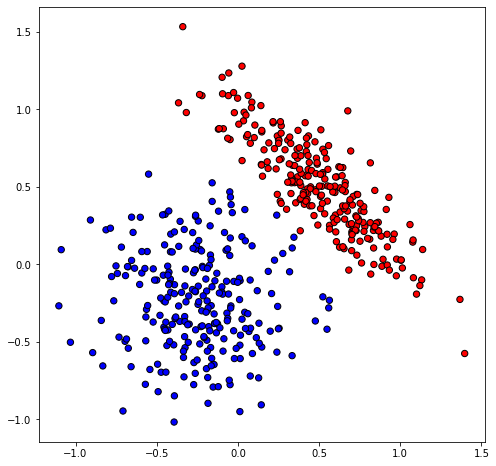

In [9]:
plt.figure(figsize=(8,8))
# grafico el dataset generate_gaussian_distributions
plot_boundaries(X1,y1)

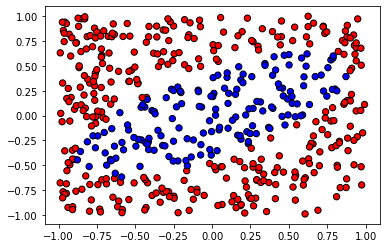

In [10]:
# grafico el dataser generate_elipse_data
plot_boundaries(X2,y2)

# Pregunta 1

Grafique los dos datasets e indique cuales de las preguntas son verdaderas

a) Uno de los datasets es linealmente separable  --> TRUE

    el dataset generate_gaussian_distributions es linealmente separable

b) Ninguno de los datasets es linealmente separable --> FALSE

    se responde con a)

c) Es de esperar que QDA tenga una mejor performance en generate_elipse_data() que Naive Bayes --> TRUE

    si, porque QDA no asume independencia y funciona mejor con la elipse

d) Es de esperar que Naive Bayes tenga una mejor performance en generate_elipse_data() --> FALSE

    No, es mejor QDA

e) generate_elipse_data() genera datos uniformente distribuidos y asigna clase azul a aquellas observaciones que quedan dentro de una elipse.  --> TRUE

    Si, se puede ver en el plot

f) generate_gaussians_distributions() genera 2 distribuciones Gaussianas bi-variables con distinto vector de medias e igual matriz de covarianza  --> FALSE

    Las medias son distintas [0.5, 0.5] vs [-0.25, -0,25]
    Las matrices de covarianza también son distintas [[0.1,-0.085],[-0.085,0.1]] vs [[0.1,0],[0,0.1]]
    
    X1 = np.random.multivariate_normal([0.5, 0.5], [[0.1,-0.085],[-0.085,0.1]], N//2)
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)

# Inicialización del modelo

Para Naive Bayes probar con: 
- priors=None, var_smoothing=1e-09 (Ambos datasets)
- priors=None, var_smoothing=0.2 (para generate_elipse_data) var_smoothing=1 (para generate_gaussians_distributions) 
- priors=[0.5, 0.5] (para generate_elipse_data) priors=[0.7, 0.3] (para generate_gaussians_distributions), var_smoothing=1e-09 

Para QDA:
- priors=None, reg_param=0.0, store_covariance=True (Ambos modelos)
- Cambio los parámetros como quiera y verifique si ocurre lo esperado

In [11]:
#model = GaussianNB(priors=None, var_smoothing=1e-09)
model = GaussianNB(priors=None, var_smoothing=1)
#model = GaussianNB(priors=[0.7, 0.3], var_smoothing=1e-09)
#model = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True)

model1 = GaussianNB(priors=None, var_smoothing=1e-09)
model2 = GaussianNB(priors=None, var_smoothing=1)
model3 = GaussianNB(priors=[0.7, 0.3], var_smoothing=1e-09)
model4 = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True)
model5 = GaussianNB(priors=[0.3, 0.7], var_smoothing=1e-09)
model6 = GaussianNB(priors=None, var_smoothing=0.2)
model7 = GaussianNB(priors=[0.5, 0.5], var_smoothing=1e-09)

In [12]:
# Entrenamiento del modelo
model.fit(X,y)
model1.fit(X,y)
model2.fit(X,y)
model3.fit(X,y)
model4.fit(X,y)
model5.fit(X,y)
model6.fit(X,y)
model7.fit(X,y)

GaussianNB(priors=[0.5, 0.5])

In [13]:
if type(model)==GaussianNB:
    print(model.classes_) 
    prior1, prior2 = model.class_prior_
    sigma1, sigma2 = model.sigma_
    mu1, mu2 = model.theta_
    ## PREGUNTA 2 ##
    #Cuando da el accuracy (score) para Naive Bayes? (Escribirlo con tres posiciones decimales)
    print(f'Accuracy Modelo GaussianNB=', model.score(X,y))
    
    
if type(model1) == GaussianNB:
    print(model1.classes_) 
    prior11, prior12 = model1.class_prior_
    sigma11, sigma12 = model1.sigma_
    mu11, mu12 = model1.theta_
    ## PREGUNTA 2 ##
    #Cuando da el accuracy (score) para Naive Bayes? (Escribirlo con tres posiciones decimales)
    print(f'Accuracy Modelo 1 GaussianNB(priors=None, var_smoothing=1e-09) =', model1.score(X,y))
    
    
if type(model2) == GaussianNB:
    print(model2.classes_) 
    prior21, prior22 = model2.class_prior_
    sigma21, sigma22 = model2.sigma_
    mu21, mu22 = model2.theta_
    ## PREGUNTA 2 ##
    #Cuando da el accuracy (score) para Naive Bayes? (Escribirlo con tres posiciones decimales)
    print(f'Accuracy Modelo 2 GaussianNB(priors=None, var_smoothing=1) =', model2.score(X,y))    
    
if type(model3) == GaussianNB:
    print(model3.classes_) 
    prior31, prior32 = model3.class_prior_
    sigma31, sigma32 = model3.sigma_
    mu31, mu32 = model3.theta_
    ## PREGUNTA 2 ##
    #Cuando da el accuracy (score) para Naive Bayes? (Escribirlo con tres posiciones decimales)
    print(f'Accuracy Modelo 3 GaussianNB(priors=[0.7, 0.3], var_smoothing=1e-09) =', model3.score(X,y))        
    
if type(model5) == GaussianNB:
    print(model5.classes_) 
    prior51, prior52 = model5.class_prior_
    sigma51, sigma52 = model5.sigma_
    mu51, mu52 = model5.theta_
    ## PREGUNTA 2 ##
    #Cuando da el accuracy (score) para Naive Bayes? (Escribirlo con tres posiciones decimales)
    print(f'Accuracy Modelo 5 GaussianNB(priors=[0.3, 0.7], var_smoothing=1e-09) =', model5.score(X,y))            
    
if type(model6) == GaussianNB:
    print(model6.classes_) 
    prior61, prior62 = model6.class_prior_
    sigma61, sigma62 = model6.sigma_
    mu61, mu62 = model6.theta_
    ## PREGUNTA 2 ##
    #Cuando da el accuracy (score) para Naive Bayes? (Escribirlo con tres posiciones decimales)
    print(f'Accuracy Modelo 6 GaussianNB(priors=None, var_smoothing=0.2) =', model6.score(X,y))    
    
if type(model7) == GaussianNB:
    print(model7.classes_) 
    prior71, prior72 = model7.class_prior_
    sigma71, sigma72 = model7.sigma_
    mu71, mu72 = model7.theta_
    ## PREGUNTA 2 ##
    #Cuando da el accuracy (score) para Naive Bayes? (Escribirlo con tres posiciones decimales)
    print(f'Accuracy Modelo 6 GaussianNB(priors=None, var_smoothing=1e-09) =', model7.score(X,y))        

[0. 1.]
Accuracy Modelo GaussianNB= 0.972
[0. 1.]
Accuracy Modelo 1 GaussianNB(priors=None, var_smoothing=1e-09) = 0.97
[0. 1.]
Accuracy Modelo 2 GaussianNB(priors=None, var_smoothing=1) = 0.972
[0. 1.]
Accuracy Modelo 3 GaussianNB(priors=[0.7, 0.3], var_smoothing=1e-09) = 0.954
[0. 1.]
Accuracy Modelo 5 GaussianNB(priors=[0.3, 0.7], var_smoothing=1e-09) = 0.988
[0. 1.]
Accuracy Modelo 6 GaussianNB(priors=None, var_smoothing=0.2) = 0.97
[0. 1.]
Accuracy Modelo 6 GaussianNB(priors=None, var_smoothing=1e-09) = 0.97


In [14]:
if type(model)==QuadraticDiscriminantAnalysis:
    print(model.classes_) 
    prior1, prior2 =  model.priors_
    mu1, mu2 = model.means_
    sigma1, sigma2 = model.covariance_
    ## PREGUNTA 3 ##
    print(f'Accuracy Modelo QDA =',model.score(X,y))
    
if type(model4)==QuadraticDiscriminantAnalysis:
    print(model.classes_) 
    prior41, prior42 =  model4.priors_
    mu41, mu42 = model4.means_
    sigma41, sigma42 = model4.covariance_
    ## PREGUNTA 3 ##
    print(f'Accuracy Modelo 4 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True) =', model4.score(X,y))        
    

[0. 1.]
Accuracy Modelo 4 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True) = 0.998


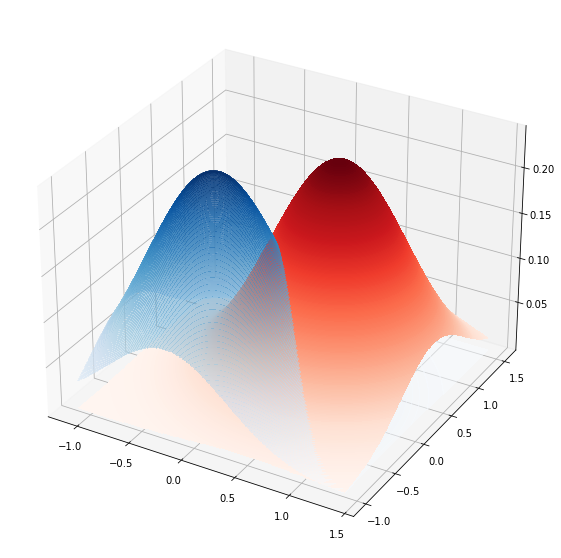

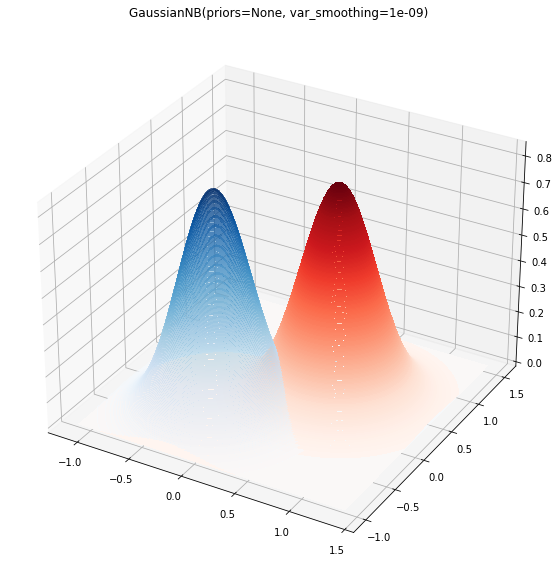

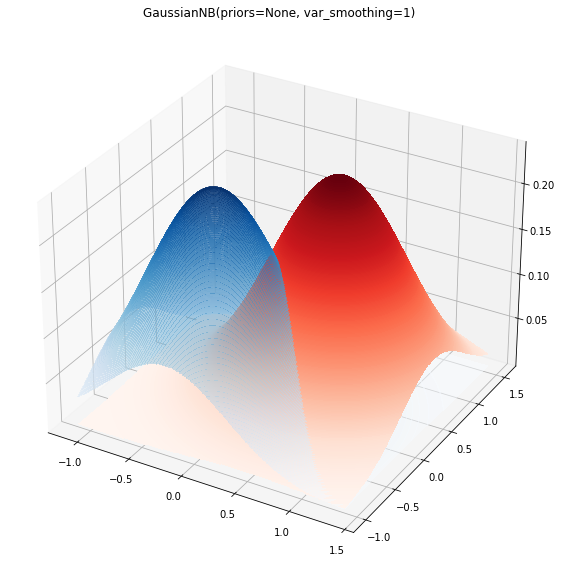

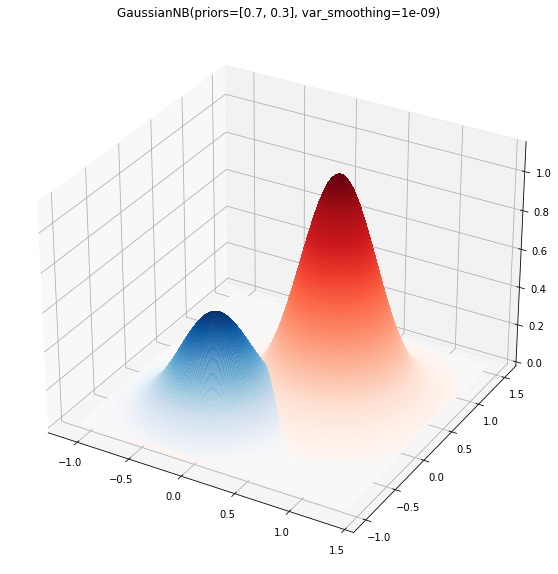

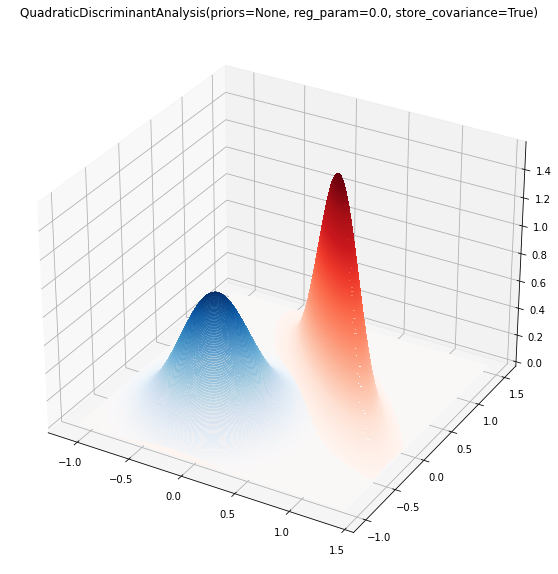

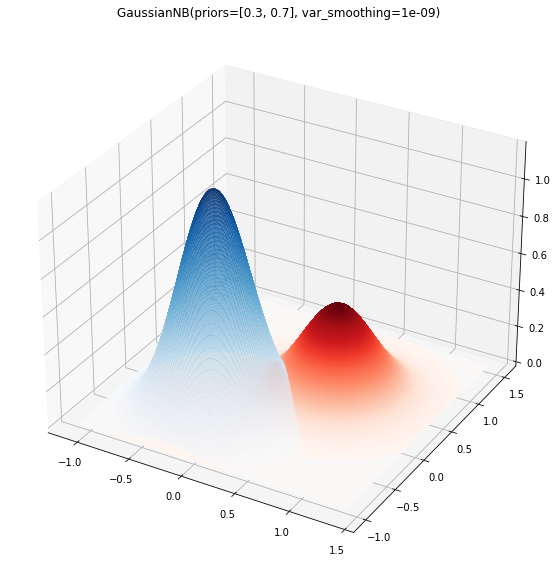

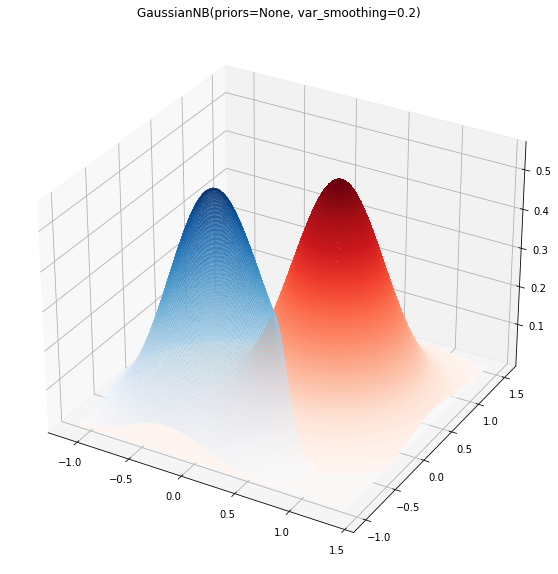

In [15]:
plot_gaussians(X, mu1, sigma1, mu2, sigma2, prior1, prior2)
plot_gaussians(X, mu11, sigma11, mu12, sigma12, prior11, prior12, titulo='GaussianNB(priors=None, var_smoothing=1e-09)')
plot_gaussians(X, mu21, sigma21, mu22, sigma22, prior21, prior22, titulo='GaussianNB(priors=None, var_smoothing=1)')
plot_gaussians(X, mu31, sigma31, mu32, sigma32, prior31, prior32, titulo='GaussianNB(priors=[0.7, 0.3], var_smoothing=1e-09)')
plot_gaussians(X, mu41, sigma41, mu42, sigma42, prior41, prior42, titulo='QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True)')
plot_gaussians(X, mu51, sigma51, mu52, sigma52, prior51, prior52, titulo='GaussianNB(priors=[0.3, 0.7], var_smoothing=1e-09)')
plot_gaussians(X, mu61, sigma61, mu62, sigma62, prior61, prior62, titulo='GaussianNB(priors=None, var_smoothing=0.2)')

# Pregunta 4 --> FALLE intento 1, tengo algo mal!!!!

a) La mejora de performance de QDA sobre Naive Bayes se debe a que el dataset fue generado con una de las Gaussianas no independiente. --> FALSE

    Las gausianas son independientes

b) Un modelo generativo es un buen modelo para este dataset --> TRUE

    QDA es un modelo generativo

c) La razón por la que queda una franja en el caso de QDA es por el hecho que la distribución de los rojos cae mas lento que la de los azules --> FALSE

    Los rojos están más concentrados que los azules y la caen más rápido

d) La razón por la que queda una franja en el caso de QDA es por el hecho que la distribución de los azules cae mas lento que la de los rojos --> TRUE

    Los rojos están más concentrados que los azules y la caen más rápido

e) Es más probable que un punto azul caiga en (1.25, 0.88) que uno rojo (para QDA) --> FALSE

    El predict [[1.25, 0.88]] da 1, por lo que es rojo. También se puede ver en el gráfico    

In [16]:
model.predict([[1.25, 0.88]])

array([[0.98566935, 0.01433065]])

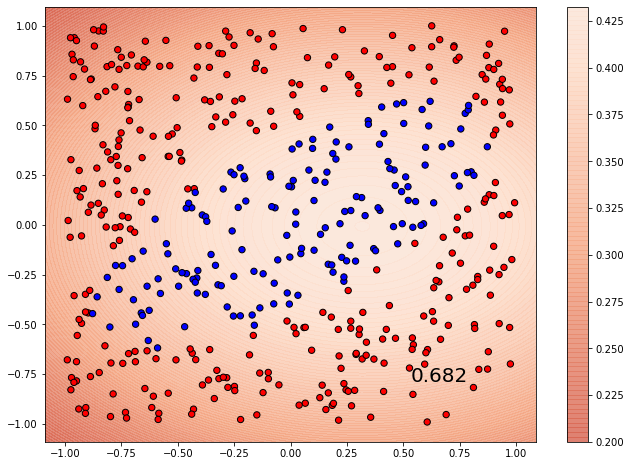

In [38]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

# Pregunta 5 --> OK!!!

Aplicar var_smoothing=1 para Naive Bayes

a) Las varianzas de las Gaussianas estimadas aumentan --> TRUE

   sigma21 y sigma22 son > a sigma11 y sigma12

b) Las varianzas de las Gaussianas estimadas disminuyen --> FALSE

   se responde con a)

c) El modelo es mas "seguro" al momento de clasificar --> FALSE

   las curvas rojas y azules se "pisan" más que con el smooth chico

d) El modelo es mas "inseguro" al momento de clasificar --> TRUE

   las curvas rojas y azules se "pisan" más que con el smooth chico

In [16]:
print(sigma11, sigma12)

[0.41777554 0.43386792] [0.19980628 0.09558933]


In [17]:
print(sigma21, sigma22)

[0.76933356 0.78542594] [0.5513643  0.44714735]


In [18]:
print(sigma31, sigma32)

[0.41777554 0.43386792] [0.19980628 0.09558933]


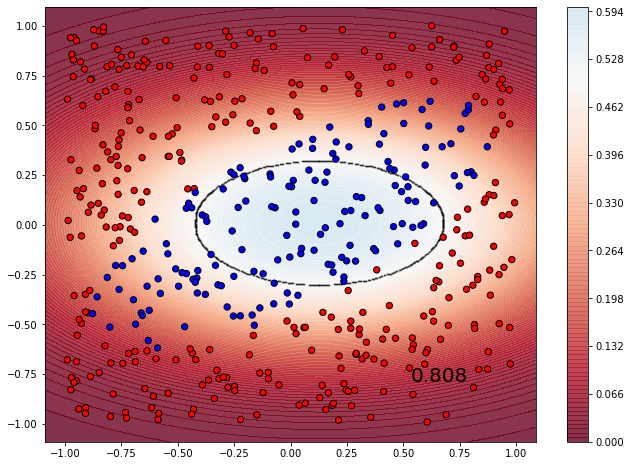

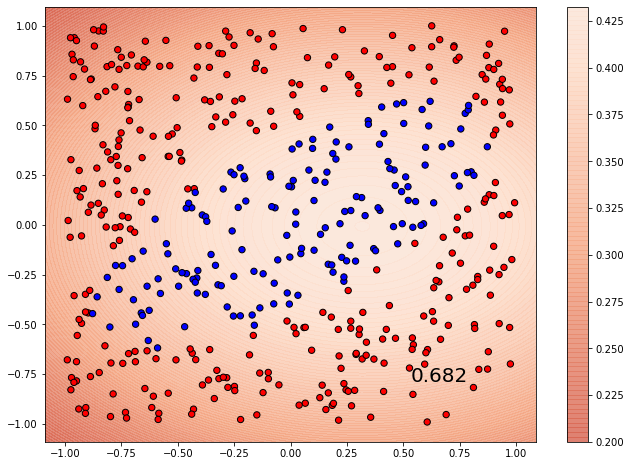

In [19]:
score = model1.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model1.predict_proba, mesh_res=500)

score = model2.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model2.predict_proba, mesh_res=500)

# Pregunta 6 --> FALLE 1er intento 

Supongamos que a pesar de que la cantidad de puntos que tenemos para las dos clases es la misma, se sabe que la probabilidad de seleccionar la Gaussiana que genera azules es 0.3 y la de generar los rojos es 0.7. Cambiar las priors y entrenar nuevamente Naive Bayes

Cuales de las siguientes afirmaciones son correctas

a) La estimación de la Gaussiana azul tiene menor altura que en el caso anterior --> FALSE
    La distribución azul ahora es más alta

b) La estimación de la Gaussiana roja tiene menor altura que en el caso anterior
    ¿cómo lo veo?

c) El umbral de decisión se corre hacia el lado de los rojos clasificando algunos rojos como azules --> FALSE
    algunos azules se clasifican como rojos

d) El umbral de decisión se corre hacia el lado de los azules clasificando algunos azules como rojos --> TRUE
    algunos azules se clasifican como rojos

[-0.24854368 -0.23132772] [-0.24854368 -0.23132772]
[[0.16078454 0.83921546]]
[[0.00158125 0.99841875]]


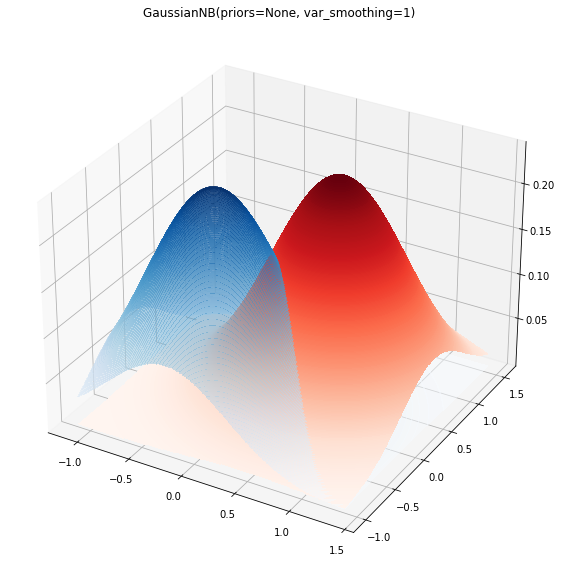

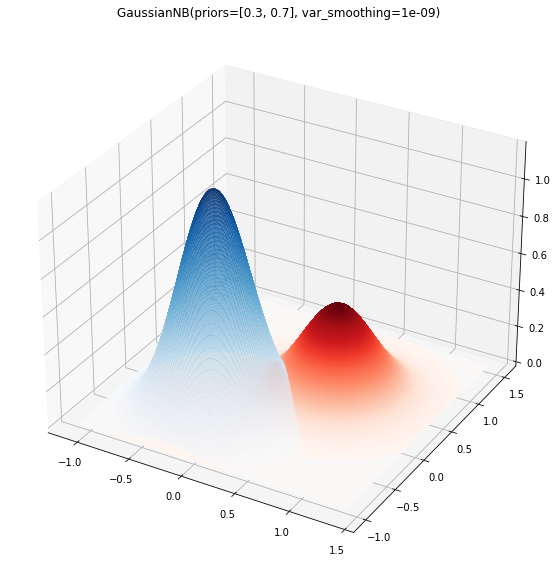

In [108]:
print (mu22, mu52)

print(model2.predict_proba([mu22]))
print(model5.predict_proba([mu52]))

#pregunta a) y b) comparo las distribuciones
plot_gaussians(X, mu21, sigma21, mu22, sigma22, prior21, prior22, titulo='GaussianNB(priors=None, var_smoothing=1)')
plot_gaussians(X, mu51, sigma51, mu52, sigma52, prior51, prior52, titulo='GaussianNB(priors=[0.3, 0.7], var_smoothing=1e-09)')

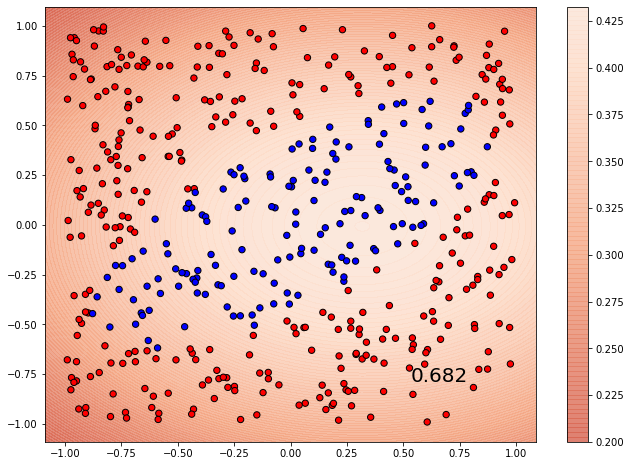

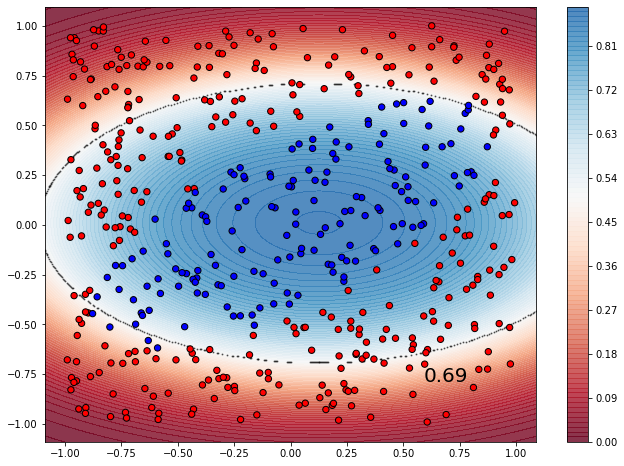

In [20]:
# preguntas c y d --> algunos azules se clasifican como rojos
score = model2.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model2.predict_proba, mesh_res=500)

score = model5.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model5.predict_proba, mesh_res=500)

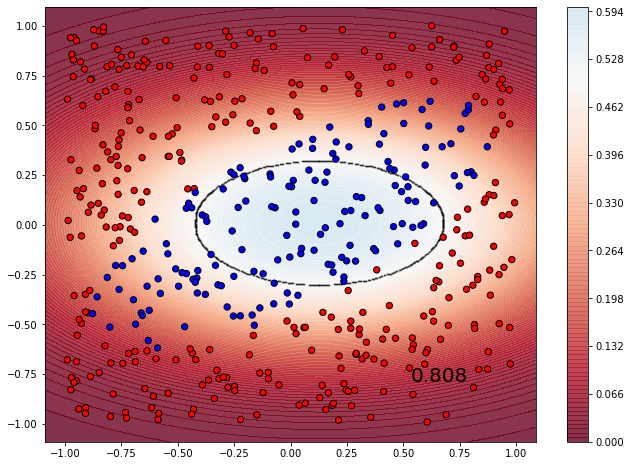

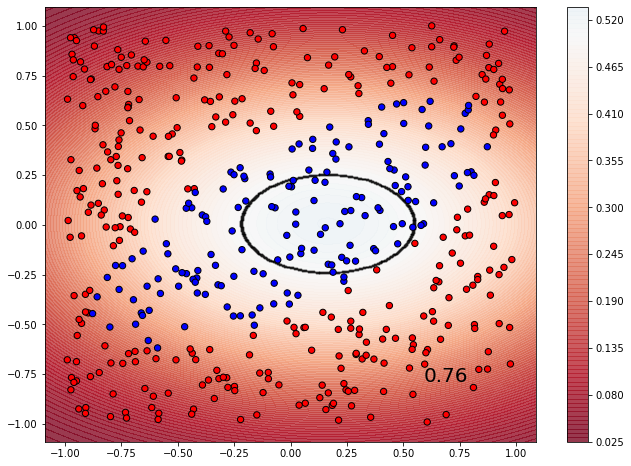

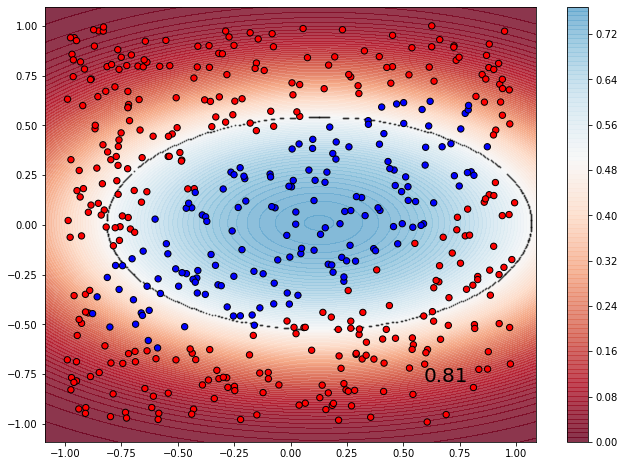

In [40]:
#Pregunta 9

plt.figure(figsize=(11,8))
plot_boundaries(X,y, model1.score(X,y), probability_func=model1.predict_proba, mesh_res=500)

plt.figure(figsize=(11,8))
plot_boundaries(X,y, model6.score(X,y), probability_func=model6.predict_proba, mesh_res=500)

plt.figure(figsize=(11,8))
plot_boundaries(X,y, model7.score(X,y), probability_func=model7.predict_proba, mesh_res=500)


In [41]:
model7.class_prior_

array([0.5, 0.5])

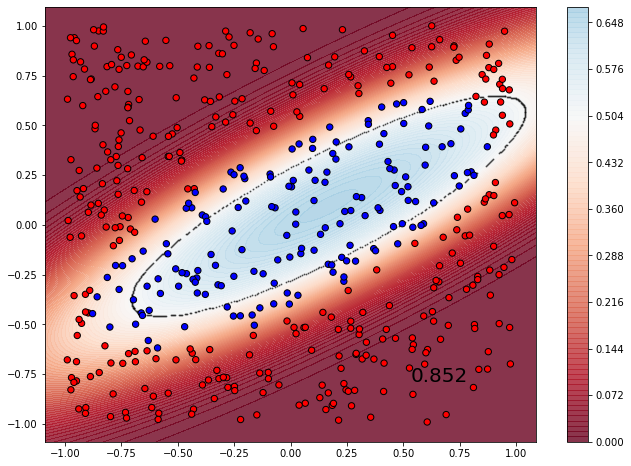

In [50]:
plt.figure(figsize=(11,8))
plot_boundaries(X,y, model4.score(X,y), probability_func=model4.predict_proba, mesh_res=500)

# Pregunta 11

Como sabemos, QDA da como solución un umbral cuadrática en el plano y supone que cada una de las clases fueron generados con la distribución Gaussiana.

Si tomamos las estimaciones Gaussianas obtenidas (para cada clase) luego de entrenar QDA y generamos igual cantidad de observaciones para cada clase que en el dataset original.

Indicar cuales de las siguientes afirmaciones son correctas

a) Las distribuciones estimadas de los likelihoods son buenos modelos generadores de las observaciones.

b) Tendremos muchos mas rojos en la zona central comparando con el dataset original

c) Podríamos tener puntos azules fuera de la elipse con que fueron recortados los datos azules en el dataset original

d) Los puntos van a quedar distribuidos uniformemente (independientemente de que sean rojos o azules) por el plano al igual que en el dataset original


In [51]:
print(mu41, mu42)
print(sigma41, sigma42)

[-0.10306606  0.03149973] [0.01642741 0.01449854]
[[ 0.41900429 -0.03087304]
 [-0.03087304  0.435144  ]] [[0.20107088 0.09373205]
 [0.09373205 0.09619433]]


In [53]:
def generate_gaussians_distributions2(N, random_state, mu1, sigma1, mu2, sigma2):
    np.random.seed(random_state)
    X1 = np.random.multivariate_normal(mu1, sigma1, N//2)
    X2 = np.random.multivariate_normal(mu2, sigma2, N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    return X, y

In [55]:
X11, y11 = generate_gaussians_distributions2(500, 42, mu41, sigma41, mu42, sigma42)

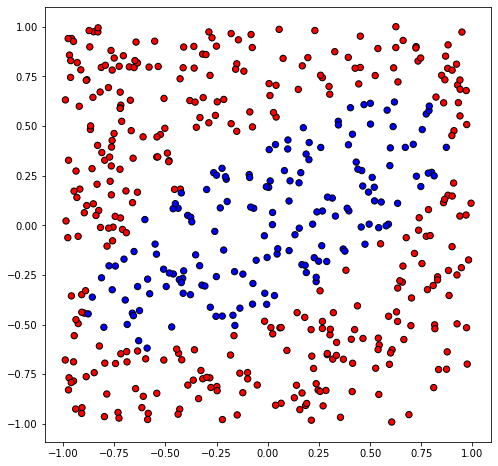

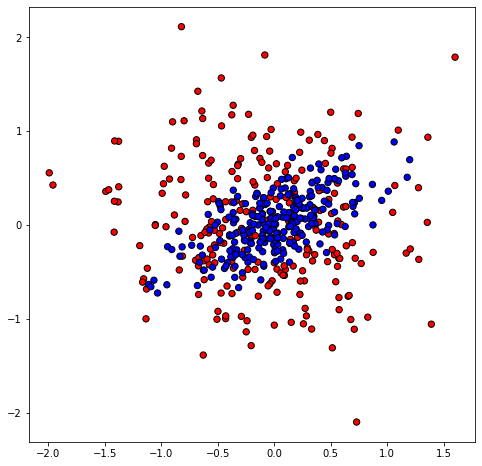

In [60]:
plt.figure(figsize=(8,8))
# grafico el dataset generate_gaussian_distributions
plot_boundaries(X2,y2)
plt.figure(figsize=(8,8))
plot_boundaries(X11,y11)